In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Visualization import *
from utils import *
from global_parameters import *
from QuantificationScripts.NucleationAndPropagationMeasurements import *

## global needed parameters and directories

In [3]:
main_exps_csv_dir = os.sep.join(os.getcwd().split(os.sep) + ['Data', 'Experiments_XYT_CSV'])
meta_data_file_path = os.sep.join([main_exps_csv_dir, 'ExperimentsMetaData.csv'])
main_exps_csv_dir = os.sep.join([main_exps_csv_dir, 'OriginalTimeMinutesData'])

# Simple cell death visualization

In [4]:
all_files_paths, exps_names = get_all_paths_csv_files_in_dir(main_exps_csv_dir)
dir_to_save_in = 'C:\\Users\\User\\PycharmProjects\\CellDeathQuantification\\VisualizationsForFigures\SimpleCellDeathVisualizations'

In [4]:
for file_idx, file_path in enumerate(all_files_paths):
    exp_name = exps_names[file_idx]
    exp_treatment, exp_time_res = get_exp_treatment_type_and_temporal_resolution(exp_file_name=exp_name+'.csv',
                                                                                 meta_data_file_full_path=meta_data_file_path)
    exp_treatment = clean_string_from_bad_chars(treatment_name=exp_treatment)
    path_to_save_fig = os.sep.join([dir_to_save_in, exp_treatment])
    visualize_cell_death_in_time(xyt_full_path=file_path, full_path_to_save_fig=path_to_save_fig, exp_treatment=exp_treatment, exp_name=exp_name)

<Figure size 432x288 with 0 Axes>

# Accumulated death visualization

In [38]:
exps_treatments_to_include = ['erastin', 'superkiller']
color_scheme = ['red', 'blue']
dir_to_save_in = 'C:\\Users\\User\\PycharmProjects\\CellDeathQuantification\\VisualizationsForFigures\AccumulatedDeathVisualization'

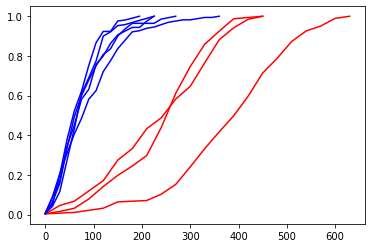

In [39]:

fig, ax = plt.subplots()
number_of_each_type = {}
for file_idx, file_path in enumerate(all_files_paths):
    exp_name = exps_names[file_idx]
    exp_treatment, exp_time_res = get_exp_treatment_type_and_temporal_resolution(exp_file_name=exp_name+'.csv',
                                                                                 meta_data_file_full_path=meta_data_file_path)
    if sum([treatment_to_include in exp_treatment for treatment_to_include in exps_treatments_to_include]) == 0:
        continue
    # if number_of_each_type.get(exp_treatment, 0) == 4:
    #     continue
    number_of_each_type[exp_treatment] = number_of_each_type.get(exp_treatment, 0) + 1
    all_readouts = calc_single_experiment_temporal_p_nuc_and_p_prop_and_endpoint_readouts_provided_temporal_resolution(single_exp_full_path=file_path, temporal_resolution=exp_time_res)
    accumulated = all_readouts[-1]
    time_axis = np.arange(0, exp_time_res*len(accumulated), exp_time_res)
    color_idx = np.where([treat in exp_treatment for treat in exps_treatments_to_include])[0]
    color = color_scheme[color_idx[0]]
    ax.plot(time_axis, accumulated, c=color, label=exp_treatment)
# plt.legend()
name_of_fig = '_and_'.join(exps_treatments_to_include)
path_to_save_fig = os.sep.join([dir_to_save_in, name_of_fig+'_accumulated_death_fraction.png'])
plt.savefig(path_to_save_fig, dpi=200)
path_to_save_fig = os.sep.join([dir_to_save_in, name_of_fig+'_accumulated_death_fraction.eps'])
plt.savefig(path_to_save_fig, dpi=200)

# Nucleators Fraction about SPI

In [24]:
exps_treatments_to_include = ['RPMI+400uM FAC&BSO', 'PEG', 'superkiller']
color_scheme = ['red', 'cyan', 'blue']
dir_to_save_in = 'C:\\Users\\User\\PycharmProjects\\CellDeathQuantification\\VisualizationsForFigures\\NucleatorsAboutSPI'
path_to_spi_df = 'C:\\Users\\User\\PycharmProjects\\CellDeathQuantification\\Data\\Experiments_old_analysis_data\\data_combined.csv'
spi_df = pd.read_csv(path_to_spi_df)

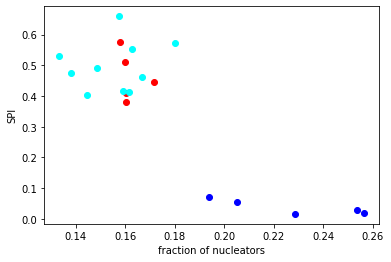

In [26]:
fig, ax = plt.subplots()
number_of_each_type = {}
for file_idx, file_path in enumerate(all_files_paths):
    exp_name = exps_names[file_idx]
    exp_treatment, exp_time_res = get_exp_treatment_type_and_temporal_resolution(exp_file_name=exp_name+'.csv',
                                                                                 meta_data_file_full_path=meta_data_file_path)
    if sum([treatment_to_include in exp_treatment for treatment_to_include in exps_treatments_to_include]) == 0:
        continue
    # if number_of_each_type.get(exp_treatment, 0) == 4:
    #     continue
    number_of_each_type[exp_treatment] = number_of_each_type.get(exp_treatment, 0) + 1
    all_readouts = calc_single_experiment_temporal_p_nuc_and_p_prop_and_endpoint_readouts_provided_temporal_resolution(single_exp_full_path=file_path, temporal_resolution=exp_time_res)
    nucleators_mask = all_readouts[-3]
    fraction_of_nucleator = nucleators_mask.sum()/len(nucleators_mask)
    exp_spi = spi_df[spi_df['name'] == exp_name]['spatial_propagation_index'].values[0]

    color_idx = np.where([treat in exp_treatment for treat in exps_treatments_to_include])[0]
    color = color_scheme[color_idx[0]]

    ax.scatter(fraction_of_nucleator, exp_spi, c=color)

ax.set_xlabel('fraction of nucleators')
ax.set_ylabel('SPI')
name_of_fig = '_and_'.join(exps_treatments_to_include)
path_to_save_fig = os.sep.join([dir_to_save_in, name_of_fig+'_fraction_of_nucleators_about_spi.png'])
plt.savefig(path_to_save_fig, dpi=200)
path_to_save_fig = os.sep.join([dir_to_save_in, name_of_fig+'_fraction_of_nucleators_about_spi.eps'])
plt.savefig(path_to_save_fig, dpi=200)


# Nucleators Fraction about treatment

In [35]:
exps_treatments_to_include = ['RPMI+400uM FAC&BSO', 'superkiller']
color_scheme = ['red', 'blue']
dir_to_save_in = 'C:\\Users\\User\\PycharmProjects\\CellDeathQuantification\\VisualizationsForFigures\\NucleatorsAboutSPI'
path_to_spi_df = 'C:\\Users\\User\\PycharmProjects\\CellDeathQuantification\\Data\\Experiments_old_analysis_data\\data_combined.csv'
spi_df = pd.read_csv(path_to_spi_df)

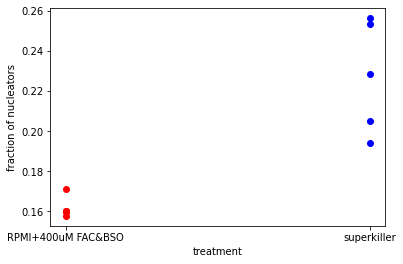

In [36]:
fig, ax = plt.subplots()
number_of_each_type = {}
for file_idx, file_path in enumerate(all_files_paths):
    exp_name = exps_names[file_idx]
    exp_treatment, exp_time_res = get_exp_treatment_type_and_temporal_resolution(exp_file_name=exp_name+'.csv',
                                                                                 meta_data_file_full_path=meta_data_file_path)
    if sum([treatment_to_include in exp_treatment for treatment_to_include in exps_treatments_to_include]) == 0 or exp_time_res!=15:
        continue
    # if number_of_each_type.get(exp_treatment, 0) == 4:
    #     continue
    number_of_each_type[exp_treatment] = number_of_each_type.get(exp_treatment, 0) + 1
    all_readouts = calc_single_experiment_temporal_p_nuc_and_p_prop_and_endpoint_readouts_provided_temporal_resolution(single_exp_full_path=file_path, temporal_resolution=exp_time_res)
    nucleators_mask = all_readouts[-3]
    fraction_of_nucleator = nucleators_mask.sum()/len(nucleators_mask)

    color_idx = np.where([treat in exp_treatment for treat in exps_treatments_to_include])[0]
    color = color_scheme[color_idx[0]]

    ax.scatter(np.where([treat in exp_treatment for treat in exps_treatments_to_include])[0][0], fraction_of_nucleator, c=color)

ax.set_xlabel('treatment')
ax.set_xticks(np.arange(0,len(exps_treatments_to_include), 1))
ax.set_xticklabels(exps_treatments_to_include)
ax.set_ylabel('fraction of nucleators')
name_of_fig = '_and_'.join(exps_treatments_to_include)
path_to_save_fig = os.sep.join([dir_to_save_in, name_of_fig+'_fraction_of_death_about_treatment.png'])
plt.savefig(path_to_save_fig, dpi=200)
path_to_save_fig = os.sep.join([dir_to_save_in, name_of_fig+'_fraction_of_death_about_treatment.eps'])
plt.savefig(path_to_save_fig, dpi=200)


# SPI about treatment

In [37]:
exps_treatments_to_include = ['RPMI+400uM FAC&BSO', 'superkiller']
color_scheme = ['red', 'blue']
dir_to_save_in = 'C:\\Users\\User\\PycharmProjects\\CellDeathQuantification\\VisualizationsForFigures\\NucleatorsAboutSPI'
path_to_spi_df = 'C:\\Users\\User\\PycharmProjects\\CellDeathQuantification\\Data\\Experiments_old_analysis_data\\data_combined.csv'
spi_df = pd.read_csv(path_to_spi_df)

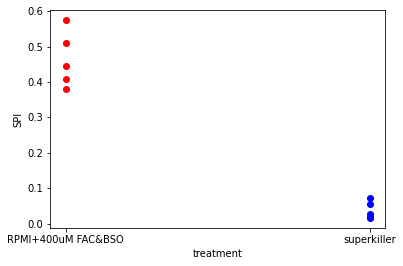

In [38]:
fig, ax = plt.subplots()
number_of_each_type = {}
for file_idx, file_path in enumerate(all_files_paths):
    exp_name = exps_names[file_idx]
    exp_treatment, exp_time_res = get_exp_treatment_type_and_temporal_resolution(exp_file_name=exp_name+'.csv',
                                                                                 meta_data_file_full_path=meta_data_file_path)
    if sum([treatment_to_include in exp_treatment for treatment_to_include in exps_treatments_to_include]) == 0 or exp_time_res!=15:
        continue
    # if number_of_each_type.get(exp_treatment, 0) == 4:
    #     continue
    number_of_each_type[exp_treatment] = number_of_each_type.get(exp_treatment, 0) + 1
    # all_readouts = calc_single_experiment_temporal_p_nuc_and_p_prop_and_endpoint_readouts_provided_temporal_resolution(single_exp_full_path=file_path, temporal_resolution=exp_time_res)
    # nucleators_mask = all_readouts[-3]
    # fraction_of_nucleator = nucleators_mask.sum()/len(nucleators_mask)
    exp_spi = spi_df[spi_df['name'] == exp_name]['spatial_propagation_index'].values[0]

    color_idx = np.where([treat in exp_treatment for treat in exps_treatments_to_include])[0]
    color = color_scheme[color_idx[0]]

    ax.scatter(np.where([treat in exp_treatment for treat in exps_treatments_to_include])[0][0], exp_spi, c=color)

ax.set_xlabel('treatment')
ax.set_xticks(np.arange(0,len(exps_treatments_to_include), 1))
ax.set_xticklabels(exps_treatments_to_include)
ax.set_ylabel('SPI')
name_of_fig = '_and_'.join(exps_treatments_to_include)
path_to_save_fig = os.sep.join([dir_to_save_in, name_of_fig+'_spi_about_treatment.png'])
plt.savefig(path_to_save_fig, dpi=200)
path_to_save_fig = os.sep.join([dir_to_save_in, name_of_fig+'_spi_about_treatment.eps'])
plt.savefig(path_to_save_fig, dpi=200)